## Import Required Libraries

In [9]:
import sys
from pathlib import Path

try:
    import pandas as pd
except ImportError as e:
    print(f"Error: Required libraries not found: {e}")
    sys.exit(1)

try:
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.rcParams['figure.figsize'] = (20, 12)
    matplotlib.rcParams['font.size'] = 10
except ImportError as e:
    print(f"Error: Matplotlib not found: {e}")
    sys.exit(1)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## Load and Explore the Data

In [10]:
def load_dataset(filepath: str) -> pd.DataFrame:
    """
    Load a CSV dataset with proper error handling.
    
    Args:
        filepath: Path to the CSV file
        
    Returns:
        DataFrame containing the loaded data
        
    Raises:
        FileNotFoundError: If file doesn't exist
        pd.errors.ParserError: If file is not valid CSV
    """
    path = Path(filepath)
    
    if not path.exists():
        raise FileNotFoundError(f"Dataset not found: {filepath}")
    
    try:
        df = pd.read_csv(path)
        return df
    except pd.errors.ParserError as e:
        raise pd.errors.ParserError(f"Failed to parse CSV file: {e}")

try:
    train_df = load_dataset('../resources/Train_knight.csv')
    test_df = load_dataset('../resources/Test_knight.csv')
    print("✓ Datasets loaded successfully")
except FileNotFoundError as e:
    print(f"✗ Error: {e}")
    sys.exit(1)
except Exception as e:
    print(f"✗ Unexpected error loading datasets: {e}")
    sys.exit(1)

✓ Datasets loaded successfully


In [11]:
print("=" * 60)
print("TRAINING DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {train_df.shape}")
print(f"\nColumns ({len(train_df.columns)}):")
print(train_df.columns.tolist())
print(f"\nData Types:")
print(train_df.dtypes)
print(f"\nMissing Values:")
print(train_df.isnull().sum())
print(f"\nClass Distribution:")
print(train_df['knight'].value_counts())
print(f"\nFirst 5 rows:")
print(train_df.head())

TRAINING DATASET OVERVIEW

Shape: (398, 31)

Columns (31):
['Sensitivity', 'Hability', 'Strength', 'Power', 'Agility', 'Dexterity', 'Awareness', 'Prescience', 'Reactivity', 'Midi-chlorien', 'Slash', 'Push', 'Pull', 'Lightsaber', 'Survival', 'Repulse', 'Friendship', 'Blocking', 'Deflection', 'Mass', 'Recovery', 'Evade', 'Stims', 'Sprint', 'Combo', 'Delay', 'Attunement', 'Empowered', 'Burst', 'Grasping', 'knight']

Data Types:
Sensitivity      float64
Hability         float64
Strength         float64
Power            float64
Agility          float64
Dexterity        float64
Awareness        float64
Prescience       float64
Reactivity       float64
Midi-chlorien    float64
Slash            float64
Push             float64
Pull             float64
Lightsaber       float64
Survival         float64
Repulse          float64
Friendship       float64
Blocking         float64
Deflection       float64
Mass             float64
Recovery         float64
Evade            float64
Stims            floa

In [12]:
print("\n" + "=" * 60)
print("TEST DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {test_df.shape}")
print(f"\nColumns: {test_df.columns.tolist()}")
if 'knight' in test_df.columns:
    print(f"\nClass Distribution:")
    print(test_df['knight'].value_counts())
else:
    print("\n⚠ Note: Test dataset has no 'knight' column (unlabeled data)")
print(f"\nFirst 5 rows:")
print(test_df.head())


TEST DATASET OVERVIEW

Shape: (171, 30)

Columns: ['Sensitivity', 'Hability', 'Strength', 'Power', 'Agility', 'Dexterity', 'Awareness', 'Prescience', 'Reactivity', 'Midi-chlorien', 'Slash', 'Push', 'Pull', 'Lightsaber', 'Survival', 'Repulse', 'Friendship', 'Blocking', 'Deflection', 'Mass', 'Recovery', 'Evade', 'Stims', 'Sprint', 'Combo', 'Delay', 'Attunement', 'Empowered', 'Burst', 'Grasping']

⚠ Note: Test dataset has no 'knight' column (unlabeled data)

First 5 rows:
   Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0        11.42     20.38     77.58   386.1  0.14250    0.28390    0.24140   
1        18.25     19.98    119.60  1040.0  0.09463    0.10900    0.11270   
2        14.68     20.13     94.74   684.5  0.09867    0.07200    0.07395   
3        13.54     14.36     87.46   566.3  0.09779    0.08129    0.06664   
4        15.34     14.26    102.50   704.4  0.10730    0.21350    0.20770   

   Prescience  Reactivity  Midi-chlorien  ...  Recovery  Evade

## Data Validation

In [13]:
def validate_dataset(df: pd.DataFrame | None, dataset_name: str, require_target: bool = True) -> bool:
    """
    Validate dataset integrity and consistency.
    
    Args:
        df: DataFrame to validate
        dataset_name: Name of the dataset for error messages
        require_target: Whether to require the 'knight' target column
        
    Returns:
        True if valid, False otherwise
    """
    if df is None or df.empty:
        print(f"✗ {dataset_name}: Dataset is empty")
        return False
    
    if require_target and 'knight' not in df.columns:
        print(f"✗ {dataset_name}: Missing 'knight' target column")
        return False
    
    if df.isnull().any().any():
        print(f"⚠ {dataset_name}: Contains missing values")
    
    if 'knight' in df.columns:
        valid_classes = {'Jedi', 'Sith'}
        if not set(df['knight'].unique()).issubset(valid_classes):
            print(f"✗ {dataset_name}: Unknown knight class found")
            return False
    
    print(f"✓ {dataset_name}: Validation passed")
    return True

train_valid = validate_dataset(train_df, "Training Dataset", require_target=True)
test_valid = validate_dataset(test_df, "Test Dataset", require_target=False)

if not (train_valid and test_valid):
    print("✗ Dataset validation failed")
    sys.exit(1)

✓ Training Dataset: Validation passed
✓ Test Dataset: Validation passed


## Create Histograms

In [14]:
def create_histograms(df: pd.DataFrame | None, title: str = "Knight Skills Distribution"):
    """
    Create overlaid histograms for all features separated by knight class.
    
    Args:
        df: DataFrame containing the data
        title: Title for the figure
        
    Returns:
        matplotlib Figure object
        
    Raises:
        ValueError: If DataFrame is empty or invalid
    """
    if df is None or df.empty:
        raise ValueError("DataFrame is empty")
    
    jedi = df[df['knight'] == 'Jedi']
    sith = df[df['knight'] == 'Sith']
    
    if len(jedi) == 0 or len(sith) == 0:
        raise ValueError("One or more knight classes are missing from the data")
    
    features = [col for col in df.columns if col != 'knight']
    n_features = len(features)
    
    n_cols = 5
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
    axes = axes.flatten()
    
    for idx, feature in enumerate(features):
        ax = axes[idx]
        
        ax.hist(jedi[feature], bins=20, alpha=0.6, label='Jedi', color='#3498db')
        ax.hist(sith[feature], bins=20, alpha=0.6, label='Sith', color='#e74c3c')
        
        ax.set_xlabel(feature, fontsize=9)
        ax.set_ylabel('Frequency', fontsize=9)
        ax.set_title(feature, fontweight='bold', fontsize=10)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(alpha=0.3, linestyle='--')
    
    for idx in range(n_features, len(axes)):
        fig.delaxes(axes[idx])
    
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    
    return fig

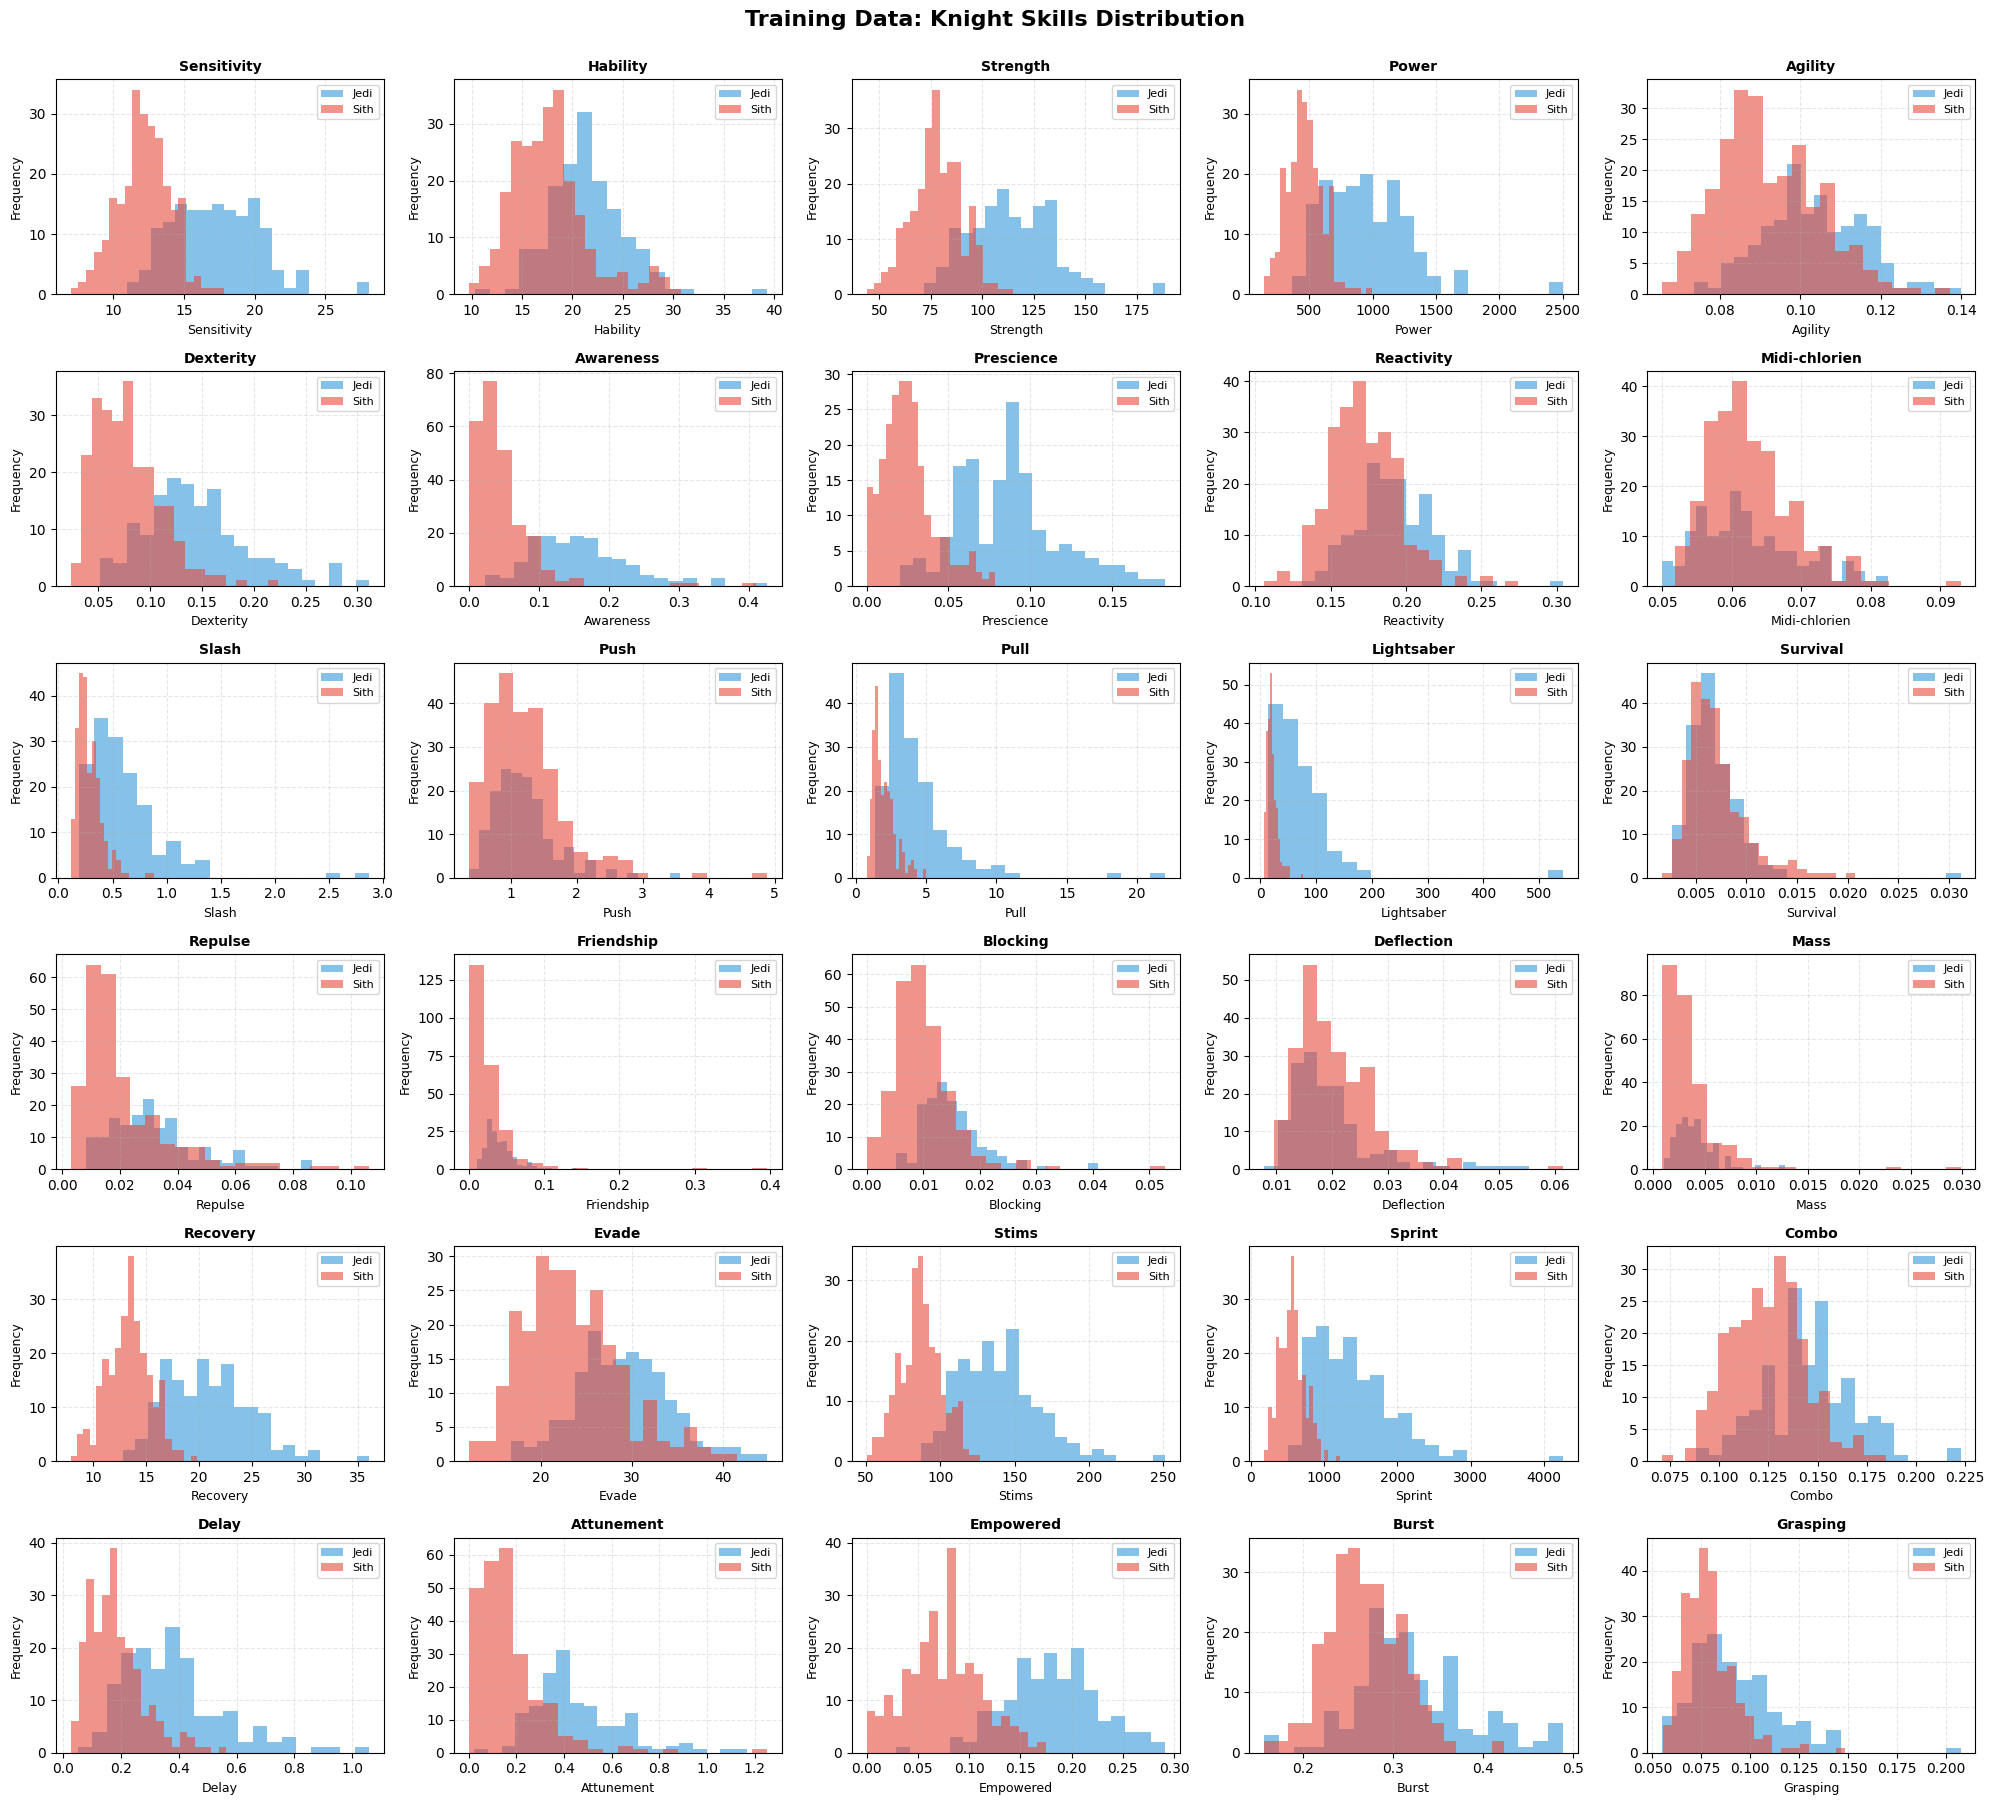

✓ Training histograms created successfully


In [15]:
try:
    fig_train = create_histograms(train_df, "Training Data: Knight Skills Distribution")
    plt.show()
    print("✓ Training histograms created successfully")
except ValueError as e:
    print(f"✗ Error creating training histograms: {e}")
    sys.exit(1)
except Exception as e:
    print(f"✗ Unexpected error: {e}")
    sys.exit(1)

In [16]:
if 'knight' in test_df.columns:
    try:
        fig_test = create_histograms(test_df, "Test Data: Knight Skills Distribution")
        plt.show()
        print("✓ Test histograms created successfully")
    except ValueError as e:
        print(f"✗ Error creating test histograms: {e}")
        sys.exit(1)
    except Exception as e:
        print(f"✗ Unexpected error: {e}")
        sys.exit(1)
else:
    fig_test = None
    print("⚠ Skipping test histograms: Test dataset has no 'knight' labels")

⚠ Skipping test histograms: Test dataset has no 'knight' labels


## Summary

- The histograms show how each skill varies between Jedi and Sith knights
- Features with clear separation between classes may be more predictive
- Some features show similar distributions across both classes